# Global mean sea level variation
Sea level is an essential climate change indicator. As the temperature of the rises, so does sea level. 

Sea level rise is caused primarily by two factors related to global warming: the added water from melting ice sheets and glaciers and the expansion of seawater as it warms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
from datetime import timedelta, datetime

import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Dataset
The dataset contains Global Mean Sea Level (GMSL) variations compared to the 20 year collinear mean reference from year 1996 - 2016, from [NASA](https://sealevel.nasa.gov/understanding-sea-level/key-indicators/global-mean-sea-level/) (download [here](https://podaac-tools.jpl.nasa.gov/drive/files/allData/merged_alt/L2/TP_J1_OSTM/global_mean_sea_level/GMSL_TPJAOS_4.2_199209_202004.txt))

The dataset is generated from the Integrated Multi-Mission Ocean Altimeter Data for Climate Research. All the observations are conducted by NASA satellites - TOPEX/Poseidon, Jason-1, OSTM/Jason-2 and Jason-3.

Similar to temperature, researchers want to visualize the figures of "anomalies" - the difference of the index between a certain year and a baseline index. Here, the mean of 1996 - 2016 segment is chosen as the baseline for the sea level anomalies between 1993 - 2020.

In [2]:
raw_data = pd.read_csv('HDR Global Mean Sea Level Data.txt', sep = "\n", skiprows = 49)
raw_data.head()

HDR Header_End---------------------------------------
0    0   11  1993.0115260    466462 337277.00    ...   
1    0   12  1993.0386920    460889 334037.31    ...   
2    0   13  1993.0658580    472123 342416.09    ...   
3    0   14  1993.0930250    421377 306050.59    ...   
4    0   15  1993.1201910    459548 331094.09    ...

In [3]:
header_names = ['Type', 'Cycle', 'Year', 'nOfObs', 'nOfWObs', 'GMSL1', 'stdGMSL1', 'smGMSL1',
                'GMSL2', 'stdGMSL2', 'smGMSL2', 'smGMSL3']
raw_data.columns = ['Lines']
df = raw_data['Lines'].str.split(n = 12, expand=True)
df.columns = header_names
df = df.astype(float)
df = df.astype({'nOfObs': int})
df.head()

Type  Cycle         Year  nOfObs    nOfWObs  GMSL1  stdGMSL1  smGMSL1  \
0   0.0   11.0  1993.011526  466462  337277.00 -37.24     92.66   -37.02   
1   0.0   12.0  1993.038692  460889  334037.31 -40.35     95.39   -38.20   
2   0.0   13.0  1993.065858  472123  342416.09 -40.17     92.29   -38.28   
3   0.0   14.0  1993.093025  421377  306050.59 -41.92     96.20   -38.56   
4   0.0   15.0  1993.120191  459548  331094.09 -36.89     94.64   -37.87   

   GMSL2  stdGMSL2  smGMSL2  smGMSL3  
0 -37.24     92.66   -37.02   -37.55  
1 -40.34     95.39   -38.19   -38.06  
2 -40.16     92.29   -38.27   -37.60  
3 -41.89     96.19   -38.54   -37.45  
4 -36.85     94.63   -37.83   -36.44

## 2. Visualization
The dataset represents GMSL variation in several conditions (column description in the data file). All biases and cross-calibrations have been applied to the data so the data are consistent between satellites

Here, we will plot a time series of 2 columns GMSL2 and smGMSL3 in time series format:  
- GMSL2 is GMSL with Global Isostatic Adjustment (GIA) applied  
- smGMSL3 is a smoothed GMSL2 with annual and semi-annual signals removed

In [4]:
df1 = df[['Year','GMSL2','smGMSL3']]
df1 = df1.set_index('Year')
df1

GMSL2  smGMSL3
Year                       
1993.011526 -37.24   -37.55
1993.038692 -40.34   -38.06
1993.065858 -40.16   -37.60
1993.093025 -41.89   -37.45
1993.120191 -36.85   -36.44
...            ...      ...
2020.214983  53.36    56.46
2020.242075  54.59    56.61
2020.269167  55.20    56.83
2020.296259  52.83    57.10
2020.323351  53.99    57.41

[1006 rows x 2 columns]

In [5]:
#df1.plot(figsize = (15,12), linewidth = 1.5)
#plt.xlabel('Time')
#plt.ylabel('GMSL variation (mm)')
#plt.title('GMSL Variation', fontsize = 30)
#plt.show()

In [7]:
#df1.iplot(kind='line', xTitle='Time (years)', 
#          yTitle='GMSL (mm)', title='Global Mean Sea Level (mm)', width = 1.5)

In [8]:
fig = go.Figure( layout=go.Layout(
        xaxis=dict(title = "Year", color = 'black'),
        yaxis=dict(title = "GMSL variation (mm)", color = 'black'),
    ))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['GMSL2'],
                name="GMSL2",
                line_color= 'rgb(256, 150, 8)', line_width = 1.5,
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['smGMSL3'],
                name="smGMSL3",
                line_color='rgb(50, 100, 185)', line_width = 1.5,
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text = "Global mean sea level variation (mm)", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.show()

From the line graph, we can see that the global mean sea level generally increase by 95mm from roughly -38mm in 1993 to 57mm in 2020. The rate of change has accelerated in recent years, about 20mm in the past five years. It is quite easy to understand if it continue to rise in the coming years, which would certainly impact countries in terms of land, population or GDP.

## 3. Prediction
In this section, we will try to predict the future trend of the variation. First, we will fit some simple model such as Linear Regression and Polynomial Regression. Next, we will use Facebook Prophet for a more accurate prediction.

### a) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
x = df1.index.values.reshape(-1, 1) 
y_GMSL2 = df1.iloc[:,0]
y_smGMSL3 = df1.iloc[:,1]
LR = LinearRegression()
LR.fit(x, y_GMSL2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Generate new years
def generate_year(start_year, end_year):
    step = 0.01
    year_list = []
    while (start_year < end_year):
        start_year += step
        year_list.append(start_year)
    return year_list

In [11]:
x_futureyears = np.array(generate_year(x.flatten()[-1], 2030)).reshape(-1, 1)
pred = LR.predict(x_futureyears)
df3 = pd.DataFrame(data = x_futureyears, columns = ['Year'])
df3['GMSL2_pred'] = pred

### b) Polynomial linear regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
poly_features = PolynomialFeatures(degree = 5)
x_poly = poly_features.fit_transform(x)
x_futureyears_poly = poly_features.fit_transform(x_futureyears)
LR.fit(x_poly, y_GMSL2)
poly_pred = LR.predict(x_futureyears_poly)
df3['GMSL2_poly_pred'] = poly_pred

In [18]:
fig = go.Figure( layout=go.Layout(xaxis=dict(title = "Year", color = 'black'),
        yaxis=dict(title = "GMSL variation (mm)", color = 'black'),
    ))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['GMSL2'],
                name="GMSL2",
                line_color= 'rgb(256, 150, 8)', line_width = 1.5,
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['smGMSL3'],
                name="smGMSL3",
                line_color='rgb(50, 100, 185)', line_width = 1.5,
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df3.Year,
                y=df1['GMSL2'].tail(1).append(df3['GMSL2_pred']),
                name="GMSL_pred",
                line_width = 1.5,
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df3.Year,
                y=df1['GMSL2'].tail(1).append(df3['GMSL2_poly_pred']),
                name="GMSL_poly_pred",
                line_width = 1.5,
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text = "Global mean sea level variation (mm)", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.show()

### c) Prophet

In [14]:
def is_leap(year):
    return year % 4 == 0 and year % 100 != 0 and year % 400 == 0
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*(365 + is_leap(year)))
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



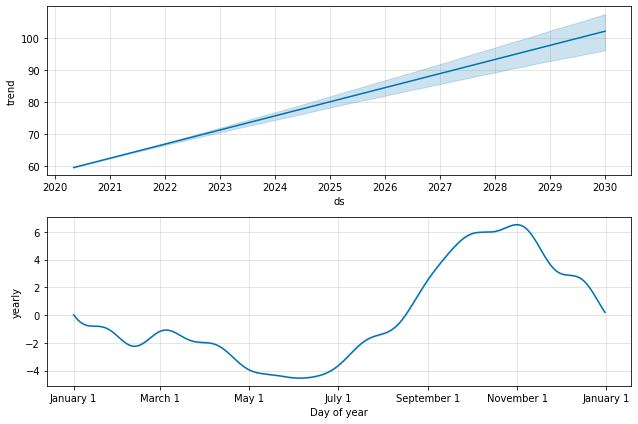

In [15]:
from fbprophet import Prophet
pp = Prophet()
df_prophet = pd.DataFrame()
df_prophet['ds'] = df1.index.values
df_prophet['ds'] = df_prophet['ds'].apply(convert_partial_year)
df_prophet['y'] = df1['GMSL2'].values
pp.fit(df_prophet)
future = pd.DataFrame(data = x_futureyears, columns = ['ds'])
future['ds'] = future['ds'].apply(convert_partial_year)
GMSL2_pp_pred = pp.predict(future)
#pp.plot(GMSL2_pp_pred)
pp.plot_components(GMSL2_pp_pred)
df3['GMSL2_pp_pred'] = GMSL2_pp_pred['yhat'].values

In [25]:
fig = go.Figure( layout=go.Layout(xaxis=dict(title = "Year", color = 'black'),
        yaxis=dict(title = "GMSL variation (mm)", color = 'black'),
    ))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['GMSL2'],
                name="GMSL2",
                line_color= 'rgb(256, 150, 8)', line_width = 1.5,
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=df1.index,
                y=df1['smGMSL3'],
                name="smGMSL3",
                line_color='rgb(50, 100, 185)', line_width = 1.5,
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df3.Year,
                y=df1['GMSL2'].tail(1).append(df3['GMSL2_pred']),
                name="GMSL_pred",
                line_width = 1.5,
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df3.Year,
                y=df1['GMSL2'].tail(1).append(df3['GMSL2_poly_pred']),
                name="GMSL_poly_pred",
                line_width = 1.5,
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df3.Year,
                y=df1['GMSL2'].tail(1).append(df3['GMSL2_pp_pred']),
                name="GMSL_pp_pred",
                line_width = 1.5,
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text = "Global mean sea level variation (mm)", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)')
fig.show()

Based on the prediction models, especially prophet, this analyse concludes that the global sea height is increasing. In 10 years from now, the variation might even double.